In [1125]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math, csv, os
from time import time
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_squared_error
from timeit import default_timer as timer
from itertools import groupby
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras import optimizers
from keras.callbacks import TensorBoard

#make size of axis tick labels larger
plt.rcParams['xtick.labelsize'], plt.rcParams['ytick.labelsize'] = 18, 18

In [1127]:
raw_data = pd.read_table('perovskite_inplane_o2_eis2.txt', sep='\t')
raw_data

,pressure,frequency,rez,imz
0,0,1.0000,7.140000e+07,-9.840000e+06
1,0,1.0798,7.100000e+07,-1.040000e+07
2,0,1.1659,7.070000e+07,-1.110000e+07
3,0,1.2588,7.040000e+07,-1.180000e+07
4,0,1.3591,7.010000e+07,-1.250000e+07
5,0,1.4673,6.960000e+07,-1.330000e+07
6,0,1.5839,6.920000e+07,-1.410000e+07
7,0,1.7097,6.890000e+07,-1.510000e+07
8,0,1.8452,6.850000e+07,-1.610000e+07
9,0,1.9912,6.780000e+07,-1.700000e+07


In [1128]:
raw_data['frequency'] = np.log(raw_data['frequency'])
raw_data['rez'] = raw_data['rez']/1000000
raw_data['imz'] = raw_data['imz']/1000000
#raw_data['pressure'] = raw_data['pressure']/100
raw_data

,pressure,frequency,rez,imz
0,0,0.000000,71.400000,-9.840000
1,0,0.076776,71.000000,-10.400000
2,0,0.153493,70.700000,-11.100000
3,0,0.230159,70.400000,-11.800000
4,0,0.306823,70.100000,-12.500000
5,0,0.383424,69.600000,-13.300000
6,0,0.459890,69.200000,-14.100000
7,0,0.536318,68.900000,-15.100000
8,0,0.612588,68.500000,-16.100000
9,0,0.688737,67.800000,-17.000000


In [1129]:
reverse = raw_data.iloc[::-1]
dataset_raw = reverse.values

#dataset_raw = raw_data.values

percent_to_train = 95 #percent used for training, remainder used for testing

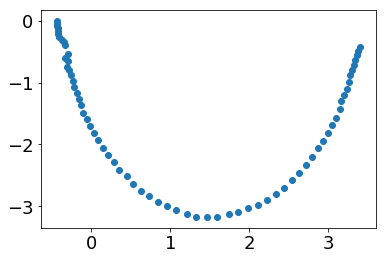

In [1130]:
# normalize the dataset
scaler = StandardScaler()#(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset_raw)
#dataset = dataset_raw

#dataset_raw = np.abs(dataset_raw)
#dataset = np.zeros_like(dataset_raw)
#for i in range(len(dataset_raw[0])):
#    new_col = (dataset_raw[:,i] - np.min(dataset_raw[:,i]))/np.max(dataset_raw[:,i])
#    dataset[:,i] = new_col

# split into train and test sets based on 'percent_to_train' variable
train_size = int(len(dataset) * percent_to_train/100) 
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# designate training and testing datasets
trainX, trainY = train[:, :2], train[:, 2:]
testX, testY = test[:, :2], test[:, 2:]

plt.scatter(testY[:,0],testY[:,1])
plt.show()

In [1131]:
# create model
in_num = len(trainX[0]) #specify number of input features
out_num = len(trainY[0]) #specify number of target features

# create neural net model and add layers to model
model = Sequential()
model.add(Dense(24, input_dim=in_num, activation='relu')) #first layer
#model.add(Dropout(.5))
model.add(Dense(12, activation='relu', kernel_initializer='normal')) #next layer
model.add(Dense(out_num, kernel_initializer='normal')) #final output
opt = optimizers.Adam(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=opt)

Train on 1104 samples, validate on 195 samples
Epoch 1/1000
1104/1104 [==============================] - 4s 3ms/step - loss: 0.8075 - val_loss: 1.1708
Epoch 2/1000
1104/1104 [==============================] - 0s 48us/step - loss: 0.8048 - val_loss: 1.1685
Epoch 3/1000
1104/1104 [==============================] - 0s 10us/step - loss: 0.8021 - val_loss: 1.1659
Epoch 4/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.7995 - val_loss: 1.1630
Epoch 5/1000
1104/1104 [==============================] - 0s 13us/step - loss: 0.7969 - val_loss: 1.1599
Epoch 6/1000
1104/1104 [==============================] - 0s 20us/step - loss: 0.7940 - val_loss: 1.1565
Epoch 7/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.7907 - val_loss: 1.1525
Epoch 8/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.7869 - val_loss: 1.1481
Epoch 9/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.7826 - val_loss: 1.1427
Epoch 10/1000

1104/1104 [==============================] - 0s 9us/step - loss: 0.1864 - val_loss: 0.2477
Epoch 79/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.1848 - val_loss: 0.2438
Epoch 80/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.1832 - val_loss: 0.2414
Epoch 81/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.1817 - val_loss: 0.2402
Epoch 82/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.1803 - val_loss: 0.2383
Epoch 83/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.1788 - val_loss: 0.2353
Epoch 84/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.1774 - val_loss: 0.2324
Epoch 85/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.1761 - val_loss: 0.2300
Epoch 86/1000
1104/1104 [==============================] - 0s 10us/step - loss: 0.1747 - val_loss: 0.2294
Epoch 87/1000
1104/1104 [==============================] - 0s 9us/st

1104/1104 [==============================] - 0s 9us/step - loss: 0.1281 - val_loss: 0.1618
Epoch 156/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.1276 - val_loss: 0.1607
Epoch 157/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.1270 - val_loss: 0.1598
Epoch 158/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.1266 - val_loss: 0.1594
Epoch 159/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.1261 - val_loss: 0.1590
Epoch 160/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.1257 - val_loss: 0.1588
Epoch 161/1000
1104/1104 [==============================] - 0s 8us/step - loss: 0.1253 - val_loss: 0.1590
Epoch 162/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.1248 - val_loss: 0.1590
Epoch 163/1000
1104/1104 [==============================] - 0s 10us/step - loss: 0.1244 - val_loss: 0.1590
Epoch 164/1000
1104/1104 [==============================] - 

1104/1104 [==============================] - 0s 11us/step - loss: 0.0902 - val_loss: 0.1213
Epoch 232/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0897 - val_loss: 0.1200
Epoch 233/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0892 - val_loss: 0.1195
Epoch 234/1000
1104/1104 [==============================] - 0s 8us/step - loss: 0.0887 - val_loss: 0.1197
Epoch 235/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0882 - val_loss: 0.1194
Epoch 236/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0876 - val_loss: 0.1187
Epoch 237/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0871 - val_loss: 0.1182
Epoch 238/1000
1104/1104 [==============================] - 0s 10us/step - loss: 0.0866 - val_loss: 0.1180
Epoch 239/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0861 - val_loss: 0.1179
Epoch 240/1000
1104/1104 [==============================] -

1104/1104 [==============================] - 0s 9us/step - loss: 0.0524 - val_loss: 0.0769
Epoch 309/1000
1104/1104 [==============================] - 0s 8us/step - loss: 0.0519 - val_loss: 0.0761
Epoch 310/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0514 - val_loss: 0.0759
Epoch 311/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0511 - val_loss: 0.0753
Epoch 312/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0506 - val_loss: 0.0744
Epoch 313/1000
1104/1104 [==============================] - 0s 8us/step - loss: 0.0503 - val_loss: 0.0734
Epoch 314/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0498 - val_loss: 0.0732
Epoch 315/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0492 - val_loss: 0.0731
Epoch 316/1000
1104/1104 [==============================] - 0s 8us/step - loss: 0.0488 - val_loss: 0.0730
Epoch 317/1000
1104/1104 [==============================] - 0

Epoch 384/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0228 - val_loss: 0.0401
Epoch 385/1000
1104/1104 [==============================] - 0s 8us/step - loss: 0.0225 - val_loss: 0.0397
Epoch 386/1000
1104/1104 [==============================] - 0s 8us/step - loss: 0.0222 - val_loss: 0.0395
Epoch 387/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0219 - val_loss: 0.0387
Epoch 388/1000
1104/1104 [==============================] - 0s 8us/step - loss: 0.0216 - val_loss: 0.0379
Epoch 389/1000
1104/1104 [==============================] - 0s 8us/step - loss: 0.0213 - val_loss: 0.0376
Epoch 390/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0211 - val_loss: 0.0375
Epoch 391/1000
1104/1104 [==============================] - 0s 8us/step - loss: 0.0208 - val_loss: 0.0372
Epoch 392/1000
1104/1104 [==============================] - 0s 8us/step - loss: 0.0205 - val_loss: 0.0365
Epoch 393/1000
1104/1104 [====================

Epoch 461/1000
1104/1104 [==============================] - 0s 10us/step - loss: 0.0079 - val_loss: 0.0173
Epoch 462/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0078 - val_loss: 0.0168
Epoch 463/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0077 - val_loss: 0.0166
Epoch 464/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0076 - val_loss: 0.0164
Epoch 465/1000
1104/1104 [==============================] - ETA: 0s - loss: 0.007 - 0s 10us/step - loss: 0.0075 - val_loss: 0.0165
Epoch 466/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0074 - val_loss: 0.0164
Epoch 467/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0073 - val_loss: 0.0164
Epoch 468/1000
1104/1104 [==============================] - ETA: 0s - loss: 0.007 - 0s 9us/step - loss: 0.0072 - val_loss: 0.0164
Epoch 469/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0071 - val_loss: 0.0

1104/1104 [==============================] - 0s 9us/step - loss: 0.0030 - val_loss: 0.0096
Epoch 538/1000
1104/1104 [==============================] - 0s 8us/step - loss: 0.0030 - val_loss: 0.0095
Epoch 539/1000
1104/1104 [==============================] - 0s 8us/step - loss: 0.0029 - val_loss: 0.0095
Epoch 540/1000
1104/1104 [==============================] - 0s 8us/step - loss: 0.0029 - val_loss: 0.0097
Epoch 541/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0029 - val_loss: 0.0096
Epoch 542/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0028 - val_loss: 0.0095
Epoch 543/1000
1104/1104 [==============================] - 0s 10us/step - loss: 0.0029 - val_loss: 0.0092
Epoch 544/1000
1104/1104 [==============================] - ETA: 0s - loss: 0.002 - 0s 10us/step - loss: 0.0028 - val_loss: 0.0090
Epoch 545/1000
1104/1104 [==============================] - 0s 9us/step - loss: 0.0027 - val_loss: 0.0091
Epoch 546/1000
1104/1104 [=========

1104/1104 [==============================] - 0s 15us/step - loss: 0.0014 - val_loss: 0.0068
Epoch 614/1000
1104/1104 [==============================] - 0s 11us/step - loss: 0.0014 - val_loss: 0.0067
Epoch 615/1000
1104/1104 [==============================] - 0s 15us/step - loss: 0.0014 - val_loss: 0.0069
Epoch 616/1000
1104/1104 [==============================] - 0s 13us/step - loss: 0.0014 - val_loss: 0.0069
Epoch 617/1000
1104/1104 [==============================] - 0s 13us/step - loss: 0.0014 - val_loss: 0.0070
Epoch 618/1000
1104/1104 [==============================] - 0s 12us/step - loss: 0.0014 - val_loss: 0.0070
Epoch 619/1000
1104/1104 [==============================] - 0s 11us/step - loss: 0.0014 - val_loss: 0.0068
Epoch 620/1000
1104/1104 [==============================] - 0s 11us/step - loss: 0.0014 - val_loss: 0.0066
Epoch 621/1000
1104/1104 [==============================] - 0s 12us/step - loss: 0.0013 - val_loss: 0.0067
Epoch 622/1000
1104/1104 [==========================

Epoch 689/1000
1104/1104 [==============================] - ETA: 0s - loss: 8.0832e-0 - 0s 9us/step - loss: 8.1627e-04 - val_loss: 0.0069
Epoch 690/1000
1104/1104 [==============================] - ETA: 0s - loss: 8.1995e-0 - 0s 9us/step - loss: 8.1621e-04 - val_loss: 0.0069
Epoch 691/1000
1104/1104 [==============================] - 0s 11us/step - loss: 8.1151e-04 - val_loss: 0.0066
Epoch 692/1000
1104/1104 [==============================] - 0s 10us/step - loss: 7.9977e-04 - val_loss: 0.0066
Epoch 693/1000
1104/1104 [==============================] - 0s 10us/step - loss: 8.0059e-04 - val_loss: 0.0067
Epoch 694/1000
1104/1104 [==============================] - ETA: 0s - loss: 8.8239e-0 - 0s 8us/step - loss: 8.0190e-04 - val_loss: 0.0068
Epoch 695/1000
1104/1104 [==============================] - 0s 9us/step - loss: 7.8858e-04 - val_loss: 0.0069
Epoch 696/1000
1104/1104 [==============================] - 0s 9us/step - loss: 7.8547e-04 - val_loss: 0.0067
Epoch 697/1000
1104/1104 [=======

1104/1104 [==============================] - 0s 9us/step - loss: 5.4337e-04 - val_loss: 0.0060
Epoch 763/1000
1104/1104 [==============================] - 0s 9us/step - loss: 5.3938e-04 - val_loss: 0.0060
Epoch 764/1000
1104/1104 [==============================] - ETA: 0s - loss: 5.8561e-0 - 0s 9us/step - loss: 5.3852e-04 - val_loss: 0.0062
Epoch 765/1000
1104/1104 [==============================] - 0s 10us/step - loss: 5.3346e-04 - val_loss: 0.0064
Epoch 766/1000
1104/1104 [==============================] - 0s 9us/step - loss: 5.2783e-04 - val_loss: 0.0065
Epoch 767/1000
1104/1104 [==============================] - 0s 8us/step - loss: 5.2976e-04 - val_loss: 0.0065
Epoch 768/1000
1104/1104 [==============================] - 0s 8us/step - loss: 5.2588e-04 - val_loss: 0.0064
Epoch 769/1000
1104/1104 [==============================] - 0s 9us/step - loss: 5.2272e-04 - val_loss: 0.0065
Epoch 770/1000
1104/1104 [==============================] - 0s 9us/step - loss: 5.1955e-04 - val_loss: 0.0

Epoch 836/1000
1104/1104 [==============================] - 0s 10us/step - loss: 4.0485e-04 - val_loss: 0.0061
Epoch 837/1000
1104/1104 [==============================] - 0s 10us/step - loss: 4.0226e-04 - val_loss: 0.0062
Epoch 838/1000
1104/1104 [==============================] - 0s 10us/step - loss: 3.9306e-04 - val_loss: 0.0063
Epoch 839/1000
1104/1104 [==============================] - 0s 9us/step - loss: 3.8957e-04 - val_loss: 0.0062
Epoch 840/1000
1104/1104 [==============================] - 0s 9us/step - loss: 3.9334e-04 - val_loss: 0.0060
Epoch 841/1000
1104/1104 [==============================] - 0s 8us/step - loss: 3.9193e-04 - val_loss: 0.0059
Epoch 842/1000
1104/1104 [==============================] - 0s 10us/step - loss: 3.8354e-04 - val_loss: 0.0061
Epoch 843/1000
1104/1104 [==============================] - 0s 9us/step - loss: 3.8155e-04 - val_loss: 0.0064
Epoch 844/1000
1104/1104 [==============================] - 0s 9us/step - loss: 3.8285e-04 - val_loss: 0.0064
Epoch 

1104/1104 [==============================] - 0s 9us/step - loss: 3.1111e-04 - val_loss: 0.0065
Epoch 910/1000
1104/1104 [==============================] - 0s 9us/step - loss: 3.0907e-04 - val_loss: 0.0063
Epoch 911/1000
1104/1104 [==============================] - 0s 9us/step - loss: 3.0493e-04 - val_loss: 0.0060
Epoch 912/1000
1104/1104 [==============================] - 0s 9us/step - loss: 3.0838e-04 - val_loss: 0.0061
Epoch 913/1000
1104/1104 [==============================] - 0s 9us/step - loss: 3.0470e-04 - val_loss: 0.0064
Epoch 914/1000
1104/1104 [==============================] - 0s 9us/step - loss: 3.0665e-04 - val_loss: 0.0064
Epoch 915/1000
1104/1104 [==============================] - 0s 9us/step - loss: 3.0524e-04 - val_loss: 0.0062
Epoch 916/1000
1104/1104 [==============================] - 0s 9us/step - loss: 3.0114e-04 - val_loss: 0.0061
Epoch 917/1000
1104/1104 [==============================] - 0s 9us/step - loss: 3.0088e-04 - val_loss: 0.0063
Epoch 918/1000
1104/1104 

1104/1104 [==============================] - 0s 8us/step - loss: 2.5425e-04 - val_loss: 0.0065
Epoch 983/1000
1104/1104 [==============================] - 0s 9us/step - loss: 2.5460e-04 - val_loss: 0.0065
Epoch 984/1000
1104/1104 [==============================] - 0s 10us/step - loss: 2.5327e-04 - val_loss: 0.0066
Epoch 985/1000
1104/1104 [==============================] - 0s 9us/step - loss: 2.5270e-04 - val_loss: 0.0065
Epoch 986/1000
1104/1104 [==============================] - 0s 8us/step - loss: 2.5167e-04 - val_loss: 0.0064
Epoch 987/1000
1104/1104 [==============================] - 0s 9us/step - loss: 2.5179e-04 - val_loss: 0.0065
Epoch 988/1000
1104/1104 [==============================] - 0s 9us/step - loss: 2.5118e-04 - val_loss: 0.0067
Epoch 989/1000
1104/1104 [==============================] - 0s 10us/step - loss: 2.5353e-04 - val_loss: 0.0067
Epoch 990/1000
1104/1104 [==============================] - 0s 9us/step - loss: 2.5442e-04 - val_loss: 0.0065
Epoch 991/1000
1104/110

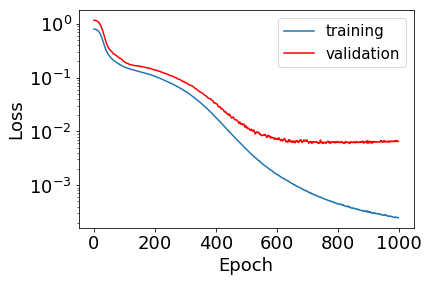

In [1132]:
#train model
train_start_time = timer()
history= model.fit(trainX, trainY, validation_split=0.15, 
                   epochs=1000, batch_size=500)#, callbacks=[tensorboard])# verbose=0)

train_end_time = timer()
tot_train_time = (train_end_time - train_start_time) / 60 #total training time in minutes
print('training time (min) = %.3f' %tot_train_time)
# Plot training
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'], c='r')
plt.ylabel('Loss', fontsize=18); plt.xlabel('Epoch', fontsize=18)
plt.legend(['training', 'validation'], fontsize=15)
plt.show()

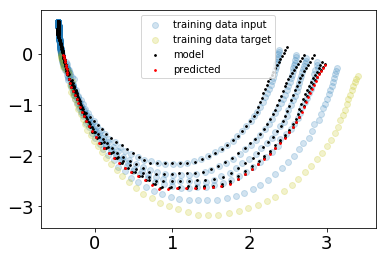

In [1133]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
plt.scatter(trainY[:,0],trainY[:,1], alpha=.2, label='training data input')
plt.scatter(testY[:,0], testY[:,1], alpha=.2, c='y', label='training data target')
plt.scatter(trainPredict[:,0], trainPredict[:,1], s=3, c='k', label='model')
plt.scatter(testPredict[:,0], testPredict[:,1], s=3, c='r', label='predicted')
plt.legend()
plt.show()

In [1134]:
# Get something which has as many features as dataset
trainPredict_extended = np.zeros((len(trainPredict),4))
# Put the predictions there
trainPredict_extended[:,:2] = trainPredict[:,:2]
# Inverse transform it and select the target column.
trainPredict = scaler.inverse_transform(trainPredict_extended)[:,:2]

# Get something which has as many features as dataset
testPredict_extended = np.zeros((len(testPredict),4))
# Put the predictions there
testPredict_extended[:,:2] = testPredict[:,:2]
# Inverse transform it and select the target column.
testPredict = scaler.inverse_transform(testPredict_extended)[:,:2]   

trainY_extended = np.zeros((len(trainY),4))
trainY_extended[:,:2]=trainY
trainY=scaler.inverse_transform(trainY_extended)[:,:2]

testY_extended = np.zeros((len(testY),4))
testY_extended[:,:2]=testY
testY=scaler.inverse_transform(testY_extended)[:,:2]

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.full_like(dataset, np.nan)
trainPredictPlot[:len(trainPredict), 1] = trainPredict[:,0]
trainPredictPlot[:len(trainPredict), 2] = trainPredict[:,1]

# shift test predictions for plotting
testPredictPlot = np.full_like(dataset, np.nan)
testPredictPlot[len(trainPredict):, 1] = testPredict[:,0]
testPredictPlot[len(trainPredict):, 2] = testPredict[:,1]

Train Score: 0.73 RMSE
Test Score: 5.60 RMSE


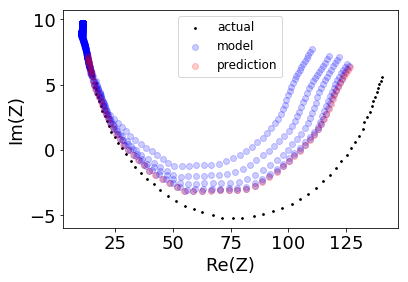

In [1135]:
#plot
plt.scatter(testY[:,0], testY[:,1], c='k', s=3, label='actual')  
plt.scatter(trainPredict[:,0], trainPredict[:,1], alpha=.2, label='model', c='b')  
plt.scatter(testPredict[:,0], testPredict[:,1], alpha=.2, label='prediction', c='r')  

plt.ylabel('Im(Z)', fontsize=18)
plt.xlabel('Re(Z)', fontsize=18)
plt.legend(fontsize=12)
plt.show()

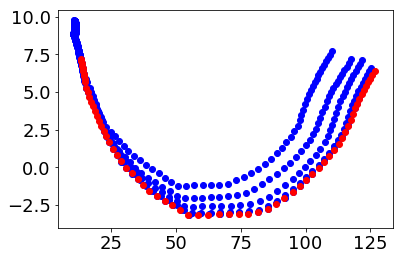

In [1136]:
plt.scatter(trainPredict[:,0], trainPredict[:,1], label='model', c='b')  
plt.scatter(testPredict[:,0], testPredict[:,1], label='prediction', c='r')  
plt.show()

#save LSTM outputs
save_outputs = {'time': raw_data.iloc[:,0],
                 'actual': raw_data.iloc[:,len(dataset_raw[0])-1],
                 'train': trainPredictPlot[:,tar_column],
                 'test': testPredictPlot[:,tar_column]}
save_df = pd.DataFrame(data=save_outputs)
save_all = save_df[['time', 'actual', 'train', 'test']].values

headerlist = ['time', 'actual', 'train', 'predict']
with open('LSTM_save_.csv', "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    writer.writerow(headerlist) #write headers
    for row in save_all: writer.writerow(row)

plot_model(model, to_file='model.png')